In [1]:
# import the necessary packages
from skimage.measure import compare_ssim
import argparse
import imutils
import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
# STEPS ARE AS FOLLLOWS
#1. load the input image
#2. Convert the images to grayscale image (i.e., from RGB to gray)
#3. Compute Structural Similarity Index (SSIM) between two images
#4. Threshold the difference image, followed by finding contours to obtain the regions of the two input images that differ
#5. loop over the contours also loop to get the largest contour should be the new detected difference)
#6. Resultant image where defect detected

In [3]:
# load the two input images
good_image = cv2.imread("good_image.png")

bad_image = cv2.imread("bad_image.png")

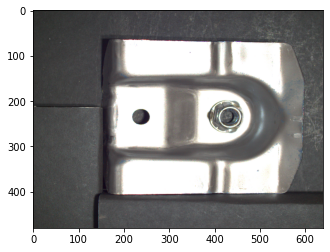

In [4]:
plt.imshow(good_image)

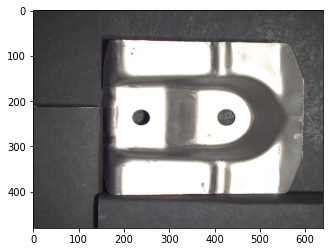

In [5]:
plt.imshow(bad_image)

In [6]:
# Convert images to grayscale
gray_good = cv2.cvtColor(good_image, cv2.COLOR_BGR2GRAY)
gray_bad = cv2.cvtColor(bad_image, cv2.COLOR_BGR2GRAY)


In [7]:

# Compute Structural Similarity Index (SSIM) between two images
(score, diff) = compare_ssim(gray_good, gray_bad, full=True)

# The diff image contains the actual image differences between the two images
# and is represented as a floating point data type in the range [0,1] 
# so we must convert the array to 8-bit unsigned integers in the range
# [0,255] before we can use it with OpenCV

diff = (diff * 255).astype("uint8")

print("Structural Similarity Index: {}".format(score))

Structural Similarity Index: 0.8851601227556992


c:\users\hp\anaconda3\envs\dogcat_test\lib\site-packages\ipykernel_launcher.py:2: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  


In [8]:
# Threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ

#thresh = cv2.threshold(<image>, <threshold value>, <max value>, <the style of thresholding>)
#thresh = cv2.threshold(diff, 0, 25, cv2.THRESH_BINARY_INV)[1]

thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]


#contour is used to find white object from black background
#so, object which we need to find should be black and that is why we used cv2.THRESH_BINARY_INV
#findContour has three argument( "source image", <contour retrieval mode>, <contour approximation method>)
# cv2.RETR_EXTERNAL : return only extreme outer flag, i.e., all child contours are left behind
# cv2.CHAIN_APPROX_SIMPLE : is use to remove all redundant points and compresses the contour , thus saving memory


contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
#contours = imutils.grab_contours(cnts)

contour_sizes = [(cv2.contourArea(cntr), cntr) for cntr in contours]

In [9]:
# loop over the contours


# The largest contour should be the detected defect
if len(contour_sizes) > 0:
    largest_contour = max(contour_sizes, key=lambda x: x[0])[1]
    x,y,w,h = cv2.boundingRect(largest_contour)
    cv2.rectangle(good_image, (x, y), (x + w, y + h), (0,255,0), 3)
    cv2.rectangle(bad_image, (x, y), (x + w, y + h), (0,255,0), 3)

    
#Resultant image where defect detected
cv2.imshow('good_image', good_image)
cv2.imshow('thresh', thresh)
cv2.imshow('bad_image', bad_image)
cv2.imshow('diff',diff)
cv2.waitKey(0)

cv2.destroyAllWindows()
